In [61]:
import torch
import torchvision.models as model
from torchvision.transforms import transforms
from PIL import Image
import matplotlib.pyplot as plt

## Load pretrained VGG16 model

In [62]:
vgg_model = model.vgg16(weights=model.VGG16_Weights.IMAGENET1K_V1)

## Data transfomer and preprocess function

In [63]:
transformer = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [64]:
def preprocess(image_path, transformer):
  img = Image.open(image_path).convert('RGB')
  img = transformer(img).unsqueeze(0)

  return img

## Download ImageNet labels

In [65]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2025-10-12 05:22:05--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.1’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.002s  

2025-10-12 05:22:05 (5.30 MB/s) - ‘imagenet_classes.txt.1’ saved [10472/10472]



In [66]:
with open('/content/imagenet_classes.txt') as f:
  categories = [line.strip() for line in f.readlines()]

## Model Inferencing

In [67]:
def infer(model, image_path):
  img = preprocess(image_path, transformer)

  model.eval()
  with torch.no_grad():
    result = model(img)
  prob = torch.nn.functional.softmax(result[0], dim=0)
  top5prob, top5id = prob.topk(5)

  output = [(categories[id], prob.item()) for id, prob in zip(top5id, top5prob)]

  return output

In [68]:
image_path = '/content/FS1325-1-big.jpg'
results = infer(vgg_model, image_path)

## Show image with inference

In [69]:
def show_image(image_path, results):
  img = Image.open(image_path).convert('RGB')
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  for i, res in enumerate(results):
    print(f'{i + 1}. {res[0]}: {res[1]:.3f}')

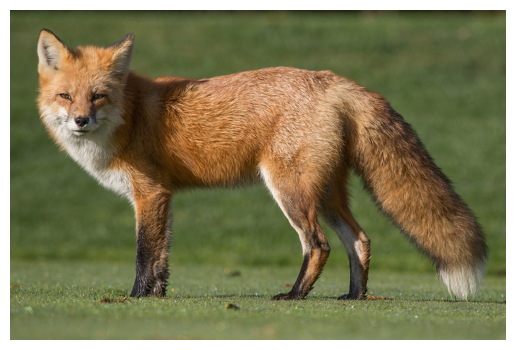

1. red fox: 0.498
2. kit fox: 0.429
3. grey fox: 0.041
4. coyote: 0.012
5. red wolf: 0.009


In [70]:
show_image(image_path, results)